# Код с результатами

In [10]:
import pstats

In [14]:
!python -m cProfile -o profiling_results/model_opt script.py --config config.yaml

************************************************ Starting Feature Space Construction in cpu ************************************************ 



************************************************ Starting 1 level of feature expansion...************************************************ 

************************************************ 1 Feature Expansion Completed with feature space size::: 1158 ************************************************ 

************************************************ Time taken to create the space is::: 0.006388187408447266  Seconds...************************************************ 

************************************************ Starting 2 level of feature expansion...************************************************ 

************************************************ 2 Feature Expansion Completed with feature space size::: 2776779 ************************************************ 

************************************************ Time taken to create the space

In [2]:
import pstats

p = pstats.Stats('profiling_results/initial')
p.strip_dirs().sort_stats("cumulative").print_stats()

Wed Dec 17 21:52:03 2025    profiling_results/initial

         115686009 function calls (115621877 primitive calls) in 326.263 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   3912/1    0.098    0.000  326.267  326.267 {built-in method builtins.exec}
        1    0.000    0.000  326.267  326.267 script.py:1(<module>)
        1    0.203    0.203  323.410  323.410 script.py:161(main)
       17    2.902    0.171  321.005   18.883 model.py:85(fit)
        3    1.277    0.426  276.042   92.014 script.py:115(cv_rmse_for_nterm)
       17    3.258    0.192  263.289   15.488 FeatureSpaceConstruction.py:514(feature_space)
       34   43.318    1.274  249.438    7.336 FeatureSpaceConstruction.py:371(combinations)
       34   89.710    2.639   89.710    2.639 FeatureSpaceConstruction.py:480(<listcomp>)
      545   71.628    0.131   71.628    0.131 {built-in method torch.cat}
       17   12.554    0.738   52.038    3.061 Regressor.

In [13]:
p = pstats.Stats('profiling_results/regressor_opt')
p.strip_dirs().sort_stats("cumulative").print_stats()

Wed Dec 17 22:52:03 2025    profiling_results/regressor_opt

         4035049 function calls (3971159 primitive calls) in 169.424 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   3914/1    0.106    0.000  169.429  169.429 {built-in method builtins.exec}
        1    0.000    0.000  169.429  169.429 script.py:1(<module>)
        1    0.194    0.194  165.526  165.526 script.py:162(main)
       17    2.766    0.163  163.160    9.598 model.py:85(fit)
        3    1.203    0.401  140.394   46.798 script.py:116(cv_rmse_for_nterm)
       17    4.002    0.235  109.206    6.424 FeatureSpaceConstruction.py:547(feature_space)
       34   36.133    1.063   94.256    2.772 FeatureSpaceConstruction.py:373(combinations)
       17   12.837    0.755   48.417    2.848 Regressor.py:19(__init__)
       17   35.577    2.093   35.577    2.093 {built-in method torch.std_mean}
      341   23.436    0.069   23.436    0.069 {built-in method torc

In [15]:
p = pstats.Stats('profiling_results/model_opt')
p.strip_dirs().sort_stats("cumulative").print_stats()

Wed Dec 17 22:57:36 2025    profiling_results/model_opt

         4035239 function calls (3971349 primitive calls) in 169.483 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   3914/1    0.106    0.000  169.489  169.489 {built-in method builtins.exec}
        1    0.000    0.000  169.489  169.489 script.py:1(<module>)
        1    0.635    0.635  165.684  165.684 script.py:162(main)
       17    0.001    0.000  160.508    9.442 model.py:40(fit)
        3    3.565    1.188  140.253   46.751 script.py:116(cv_rmse_for_nterm)
       17    4.034    0.237  108.619    6.389 FeatureSpaceConstruction.py:547(feature_space)
       34   35.820    1.054   93.701    2.756 FeatureSpaceConstruction.py:373(combinations)
       17   12.834    0.755   48.580    2.858 Regressor.py:19(__init__)
       17   35.744    2.103   35.744    2.103 {built-in method torch.std_mean}
      341   23.328    0.068   23.328    0.068 {built-in method torch.ca

In [20]:
p = pstats.Stats('profiling_results/initial')
p.strip_dirs().sort_stats("cumulative").print_stats()

Tue Dec 16 18:48:29 2025    profiling_results/initial

         115716099 function calls (115647857 primitive calls) in 607.251 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.111    0.111  599.279  599.279 script.py:154(main)
       17    1.580    0.093  589.691   34.688 model.py:87(fit)
        3    1.030    0.343  522.786  174.262 script.py:121(cv_rmse_for_nterm_on_train)
       17    2.008    0.118  466.872   27.463 FeatureSpaceConstruction.py:457(feature_space)
       34  255.614    7.518  452.489   13.308 FeatureSpaceConstruction.py:333(combinations)
       17   11.307    0.665  111.926    6.584 Regressor.py:25(__init__)
      545  107.023    0.196  107.023    0.196 {built-in method torch.cat}
       17   91.895    5.406   91.895    5.406 {method 'std' of 'torch._C.TensorBase' objects}
       68   18.531    0.273   18.531    0.273 {built-in method torch.isinf}
      136   18.267    0.134   18.267    0

In [4]:
import numpy as np
import subprocess
import re

cmd = "time mpirun -n {} --allow-run-as-root --oversubscribe python3 script.py --config config.yaml"
n_repeats = 1
times = list()
errors = list()

for n in range(1, 4):
    print(f"Running for {n} processes")
    repeats = list()
    for _ in range(n_repeats):
        res = subprocess.run(cmd.format(n), shell=True, capture_output=True, text=True)

        match = re.search(r'(\d+):(\d+\.\d+)elapsed', res.stderr)
        minutes = int(match.group(1))
        seconds = float(match.group(2))

        total_elapsed = minutes * 60 + seconds
        repeats.append(total_elapsed)
        
    times.append(np.mean(repeats))
    errors.append(np.std(repeats))

Running for 1 processes
Running for 2 processes
Running for 3 processes


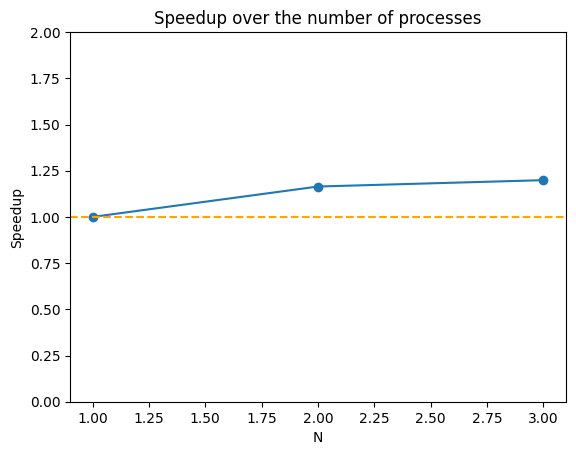

In [5]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1, 4), times[0] / times, marker='o')
plt.axhline(1, linestyle='--', color='orange')
plt.title('Speedup over the number of processes')
plt.xlabel('N')
plt.ylabel('Speedup')
plt.ylim(0, 2)
plt.show()

In [6]:
times[0] / times

array([1.        , 1.16449086, 1.19892473])

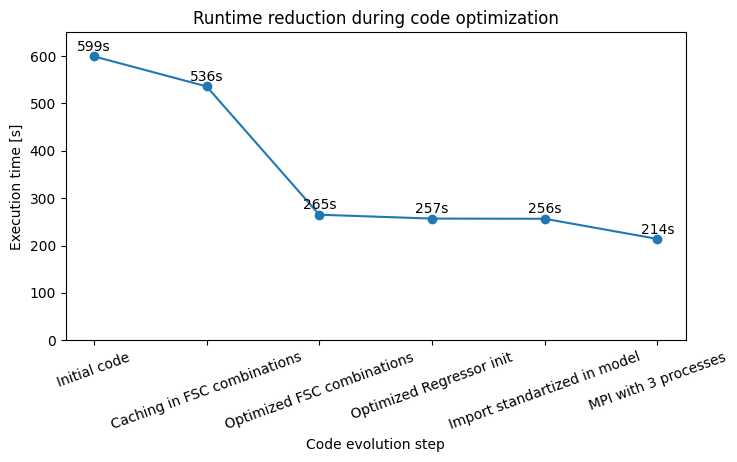

In [ ]:
import matplotlib.pyplot as plt

# ============================================================
# PLACEHOLDERS (данные взяты из файлов профиллирования, можно проверить при желании)
# ============================================================

# Названия этапов (по оси X)
stages = [
    "Initial code",
    "Caching in FSC combinations",
    "Optimized FSC combinations",
    "Optimized Regressor init",
    "Import standartized in model",
    "MPI with 3 processes"
]

# Время выполнения в секундах (по оси Y)
times_sec = [
    599.279,
    535.861,
    265.057,
    256.872,
    256.489,
    256.489 / 1.19892473 # эксперименты с mpi и без выполнялись на разных машинах, поэтому считаем так
]

x = list(range(len(stages)))

plt.figure(figsize=(8, 4))
plt.plot(x, times_sec, marker="o")

plt.xticks(x, stages, rotation=20)
plt.ylabel("Execution time [s]")
plt.xlabel("Code evolution step")
plt.title("Runtime reduction during code optimization")
plt.ylim(0, 650)

for xi, ti in zip(x, times_sec):
    plt.text(xi, ti + 5, f"{ti:.0f}s", ha="center", va="bottom")


plt.show()